## Exercise 1: estimating the sample mean and sample variance

You are a statistician working for the U.S. Department of Commerce on the U.S. Census. Congrats! You found a job!

You have been tasked with figuring out the statistical distribution of the heights of people in NYC. You measure the heights of nine people in centimeters and call it a day. Their heights are given in the list `heights` below.

Without `numpy`, estimate the sample mean and sample variance of the distribution.

In [1]:
heights = [176.2, 157.9, 160.1, 180.9, 165.1, 167.2, 162.9, 155.7, 166.2]

In [2]:
#Your code here
#sample_mean = 
#sample_variance = 

## Exercise 2: visualizing and sampling from distributions

Your boss forgot what some distributions look like and they want you to make some plots for them. Thankfully they now let you use `numpy`, `scipy`, and `matplotlib`. Below, plot the binomial and Gaussian (normal) distributions. Overplot samples drawn from the distributions as visualized by histograms.

Note: try making the binomial distribution with $p\neq 0.5$ and see how it looks. Is it symmetric?

In [3]:
import numpy as np
import scipy as sp
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rc("text", usetex=True) #uncomment for pretty font
plt.rc("font", size=18, family="serif")

In [4]:
#Your code here
def plot_binomial_with_samples(n, p, n_samples = 1000000):
    pass

plot_binomial_with_samples(20, 0.5)

In [5]:
def plot_gaussian_with_samples(mean, var, n_samples = 1000000):
    pass

plot_gaussian_with_samples(5, 2)

### Solution is below!
### Try to complete the exercise before going further!
### It's for your own benefit!

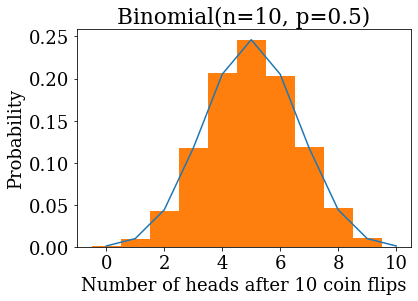

In [6]:
#Solution
def plot_binomial_with_samples(n, p, n_samples = 10000):
    def p_x_binomial(k, n, p):
        return sp.special.comb(n, k) * p**k * (1-p)**(n-k)
    
    x = np.arange(n+1) #Array of possible values
    probs = [p_x_binomial(k, n, p) for k in x] #Probabilities
    samples = np.random.choice(x, size = n_samples, p = probs)
    
    plt.plot(x, probs)
    plt.hist(samples, density=True, bins=len(x)-1, align="left")
    plt.title(f"Binomial(n={n}, p={p})")
    plt.ylabel("Probability")
    plt.xlabel(f"Number of heads after {n} coin flips")
    return plt.gcf()

fig = plot_binomial_with_samples(10, 0.5)

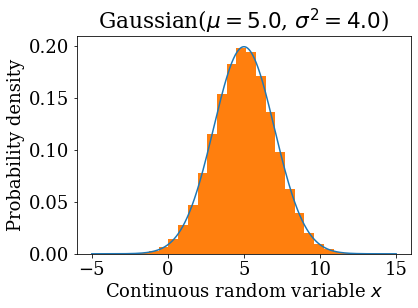

In [7]:
def plot_gaussian_with_samples(mean, var, n_samples = 1000000):
    def p_x_gaussian(x, mu, var):
        return (2*np.pi*var)**0.5 * np.exp(-(x-mu)**2 / (2*var))
    
    x = np.linspace(mean - 5*np.sqrt(var), mean + 5*np.sqrt(var) , num=1000)
    probs = [p_x_gaussian(k, mean, var) for k in x]
    samples = np.random.choice(x, size = n_samples, p = probs/np.sum(probs))

    plt.plot(x, probs / ((x[1] - x[0])*np.sum(probs)))
    plt.hist(samples, density=True, bins=30)
    plt.title(r"Gaussian($\mu=%.1f$, $\sigma^2=%.1f$)"%(mean, var))
    plt.ylabel("Probability density")
    plt.xlabel(r"Continuous random variable $x$")
    return plt.gcf()

fig = plot_gaussian_with_samples(5, 4)

## Exercise 3: verifying the CLT
The CLT is very powerful in that you can use it to learn about the sample mean for _any_ distribution that has a mean and variance defined. As an extreme example, make repeated draws from a Bernoilli distribution and plot the distribution of sample means. Concretely, say you take a million draws. Find sample means for individual sets of 100 samples. Then, plot the distribution of the normalized sample means.

As a reminder, the Bernoulli distribution looks like:
$$
X \sim p^x(1-p)^{1-x}\,.
$$
Note that the Bernoulli distribution has a mean and variance of $\mu_x = p$ and $\sigma^2 = p(1-p)$, respectively (deriving these are left as an exercise to the fellow).

The sample mean is defined as
$$
\bar{X} = \frac{1}{N}\sum_{i=1}^N X_i
$$
and the CLT requires you to normalize the sample mean according to:
$$
Z_N = \frac{\bar{X} - \mu_X}{\sigma/N}\,.
$$

Bonus: what happens to the CLT when the probability of heads ($p$) gets very close to an extreme (0 or 1)?

In [8]:
#Your code here
def CLT_with_Bernoulli(p, n_samples = 1000000, n_means = 10000):
    pass

CLT_with_Bernoulli(p = 0.5)

### Solution is below!
### Try to complete the exercise before going further!
### It's for your own benefit!

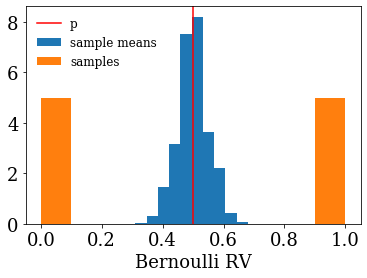

In [9]:
def CLT_with_Bernoulli(p, n_samples = 1000000, n_means = 10000):
    #draw samples
    samples = np.random.choice([0, 1], size = n_samples, p = [p, 1-p])
    
    #compute sample means
    z = np.zeros(n_means)
    i = 0
    for index in range(0, n_samples, n_samples // n_means):
        z[i] = np.mean(samples[index: index + n_samples // n_means])
        i += 1
    plt.hist(z, density = True, label = "sample means")
    plt.hist(samples, density = True, label = "samples")
    plt.axvline(p, label = "p", c="red")
    plt.xlabel("Bernoulli RV")
    plt.legend(frameon = False, fontsize=12, loc="upper left")
    return plt.gcf()

fig = CLT_with_Bernoulli(p = 0.5)